true positive - IOUGT above threshold
total count = all bounding boxes above IOUGT

False Positive
bounding boxes below IOUGT
Total count - all bounding boxes below IOUGT

False Negative
ground truths undetected
Total ground truths that do not having matching bounding box
For each image:
go through each GT bounding box
match with all bounding boxes present:
Place highest number present
total GT's below a certain threshold


In [123]:
import os
import json

# Assume `json_string` contains the JSON string you want to parse
file_name = './twentyFiveDict.json'
# file_name = './droneDict.json'

my_data = {}

with open(file_name, 'r', encoding='utf-8') as f:
    my_data = json.load(f)


In [124]:
list(my_data.keys())

['conditional-detr-resnet-50,',
 'detr-resnet-101,',
 'detr-resnet-50,',
 'yolos-base,',
 'yolos-tiny,',
 'conditional-detr-resnet-50,detr-resnet-101,',
 'conditional-detr-resnet-50,detr-resnet-50,',
 'conditional-detr-resnet-50,yolos-base,',
 'conditional-detr-resnet-50,yolos-tiny,',
 'detr-resnet-101,detr-resnet-50,',
 'detr-resnet-101,yolos-base,',
 'detr-resnet-101,yolos-tiny,',
 'detr-resnet-50,yolos-base,',
 'detr-resnet-50,yolos-tiny,',
 'yolos-base,yolos-tiny,',
 'conditional-detr-resnet-50,detr-resnet-101,detr-resnet-50,',
 'conditional-detr-resnet-50,detr-resnet-101,yolos-base,',
 'conditional-detr-resnet-50,detr-resnet-101,yolos-tiny,',
 'conditional-detr-resnet-50,detr-resnet-50,yolos-base,',
 'conditional-detr-resnet-50,detr-resnet-50,yolos-tiny,',
 'conditional-detr-resnet-50,yolos-base,yolos-tiny,',
 'detr-resnet-101,detr-resnet-50,yolos-base,',
 'detr-resnet-101,detr-resnet-50,yolos-tiny,',
 'detr-resnet-101,yolos-base,yolos-tiny,',
 'detr-resnet-50,yolos-base,yolos-tin

In [125]:
iou = .5
conf = .5


In [132]:
from statistics import mean
import numpy as np

finalDict = {}
finalCountDict = {}
for key in list(my_data.keys()):
    TP = []
    TPCount = 0
    FP = []
    FPCount = 0
    FN = []
    FNCount = 0
    data = my_data[key]
    for eachImage in data:
        for detection in eachImage:
            if detection == 'FN':
                for detect in eachImage['FN']:
                    FN.append(detect)
                    FNCount = FNCount +1
                continue
       
            data = eachImage[detection]
            x = np.array(data['confidence'])
            confidence = x.astype(np.float)
            if mean(confidence) > conf:
                if data['iouGT'] > iou:
                    TP.append(data)
                    TPCount = TPCount+1
                else:
                    FP.append(data)
                    FPCount= FPCount + 1
    finalDict[key] = {'TruePositive': TP, 'FalsePositive': FP, 'FalseNegative': FN}
    finalCountDict[key] = {'TruePositive': TPCount, 'FalsePositive': FPCount, 'FalseNegative': FNCount}

C:\Users\lpana\AppData\Local\Temp/ipykernel_23220/3239791228.py:24: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [133]:
import pandas as pd

In [134]:
dataFrame = pd.DataFrame.from_dict(finalDict)
dataFrame


,"conditional-detr-resnet-50,","detr-resnet-101,","detr-resnet-50,","yolos-base,","yolos-tiny,","conditional-detr-resnet-50,detr-resnet-101,","conditional-detr-resnet-50,detr-resnet-50,","conditional-detr-resnet-50,yolos-base,","conditional-detr-resnet-50,yolos-tiny,","detr-resnet-101,detr-resnet-50,",...,"detr-resnet-101,detr-resnet-50,yolos-base,","detr-resnet-101,detr-resnet-50,yolos-tiny,","detr-resnet-101,yolos-base,yolos-tiny,","detr-resnet-50,yolos-base,yolos-tiny,","conditional-detr-resnet-50,detr-resnet-101,detr-resnet-50,yolos-base,","conditional-detr-resnet-50,detr-resnet-101,detr-resnet-50,yolos-tiny,","conditional-detr-resnet-50,detr-resnet-101,yolos-base,yolos-tiny,","conditional-detr-resnet-50,detr-resnet-50,yolos-base,yolos-tiny,","detr-resnet-101,detr-resnet-50,yolos-base,yolos-tiny,","conditional-detr-resnet-50,detr-resnet-101,detr-resnet-50,yolos-base,yolos-tiny,"
TruePositive,[],"[{'imgName': '000000110999.jpg', 'IOU': 1.0, '...","[{'imgName': '000000154004.jpg', 'IOU': 1.0, '...","[{'imgName': '000000099114.jpg', 'IOU': 1.0, '...","[{'imgName': '000000092939.jpg', 'IOU': 1.0, '...","[{'imgName': '000000035197.jpg', 'IOU': 0.8209...","[{'imgName': '000000154004.jpg', 'IOU': 0.8889...","[{'imgName': '000000481390.jpg', 'IOU': 0.8925...",[],"[{'imgName': '000000092939.jpg', 'IOU': 0.8763...",...,"[{'imgName': '000000414673.jpg', 'IOU': 0.8665...",[],"[{'imgName': '000000414673.jpg', 'IOU': 0.9126...",[],"[{'imgName': '000000154004.jpg', 'IOU': 0.8818...",[],"[{'imgName': '000000254368.jpg', 'IOU': 0.8619...",[],"[{'imgName': '000000271471.jpg', 'IOU': 0.9252...","[{'imgName': '000000035197.jpg', 'IOU': 0.9309..."
FalsePositive,[],"[{'imgName': '000000099114.jpg', 'IOU': 1.0, '...","[{'imgName': '000000092939.jpg', 'IOU': 1.0, '...","[{'imgName': '000000099114.jpg', 'IOU': 1.0, '...","[{'imgName': '000000035197.jpg', 'IOU': 1.0, '...","[{'imgName': '000000099114.jpg', 'IOU': 0.8036...","[{'imgName': '000000035197.jpg', 'IOU': 0.8185...","[{'imgName': '000000035197.jpg', 'IOU': 0.8617...","[{'imgName': '000000569273.jpg', 'IOU': 0.8232...","[{'imgName': '000000035197.jpg', 'IOU': 0.8566...",...,"[{'imgName': '000000414673.jpg', 'IOU': 0.8975...","[{'imgName': '000000154004.jpg', 'IOU': 0.8008...","[{'imgName': '000000414673.jpg', 'IOU': 0.8178...","[{'imgName': '000000323895.jpg', 'IOU': 0.8157...",[],"[{'imgName': '000000154004.jpg', 'IOU': 0.8023...","[{'imgName': '000000154004.jpg', 'IOU': 0.8047...",[],"[{'imgName': '000000506178.jpg', 'IOU': 0.9451...","[{'imgName': '000000154004.jpg', 'IOU': 0.9332..."
FalseNegative,"[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...",...,"[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.0637065, 0.0, 0.6067835, 0.665172]...","[[person, 0.861212, 0.37392149999999996, 0.967..."


In [140]:
dataFrameCount = pd.DataFrame.from_dict(finalCountDict)
dataFrameCount = dataFrameCount.T.reset_index()
dataFrameCount = dataFrameCount.melt(id_vars = 'index')
# dataFrameCount = dataFrameCount.loc[(dataFrameCount['value'] > 0) & ((dataFrameCount['variable'] == 'TruePositive') | (dataFrameCount['variable'] == 'FalsePositive'))]
# dataFrameCount = dataFrameCount.sort_values('value')


dataFrameCount

,index,variable,value
0,"conditional-detr-resnet-50,",TruePositive,0
1,"detr-resnet-101,",TruePositive,9
2,"detr-resnet-50,",TruePositive,5
3,"yolos-base,",TruePositive,15
4,"yolos-tiny,",TruePositive,42
...,...,...,...
88,"conditional-detr-resnet-50,detr-resnet-101,det...",FalseNegative,95
89,"conditional-detr-resnet-50,detr-resnet-101,yol...",FalseNegative,94
90,"conditional-detr-resnet-50,detr-resnet-50,yolo...",FalseNegative,96
91,"detr-resnet-101,detr-resnet-50,yolos-base,yolo...",FalseNegative,92


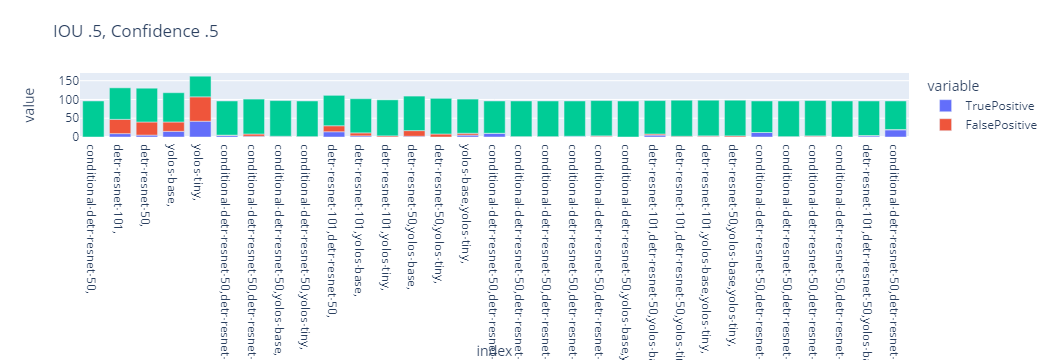

In [141]:
import plotly.express as px

fig = px.bar(dataFrameCount, x="index", y="value", color="variable", title="IOU .5, Confidence .5")
fig.show()

In [145]:
dataFrame['detr-resnet-101,detr-resnet-50,yolos-base,yolos-tiny,']['FalsePositive']

[{'imgName': '000000506178.jpg',
  'IOU': 0.9451126698765301,
  'boxes': {'detr-resnet-101': ['person',
    '0.8167',
    '0.1879',
    '1.0',
    '0.9939',
    '0.976'],
   'detr-resnet-50': ['person',
    '0.8228',
    '0.1939',
    '0.9997',
    '0.9928',
    '0.956'],
   'yolos-base': ['person', '0.8195', '0.1932', '1.0005', '0.9976', '0.981'],
   'yolos-tiny': ['person', '0.8158', '0.1926', '0.9999', '0.9944', '0.938']},
  'shape': [0.8228, 0.1939, 0.9997, 0.9928],
  'confidence': ['0.976', '0.956', '0.981', '0.938'],
  'iouGT': 0.27992800875715484,
  'gtShape': ['person',
   '0.8262400000000001',
   '0.19836',
   '1.0',
   '0.42654000000000003']}]

To improve f1 you likely want to add ones that have more true positive than false positive



In [13]:
keys = ['keypoint,', 'keypoint,retinanet,', 'faster_rcnn,keypoint,', 'faster_rcnn,keypoint,retinanet,']
unique_keys = []
for key in keys:
    key_list = key.split(',')
    for item in key_list:
        if item and item not in unique_keys:
            unique_keys.append(item)
print(unique_keys)

['keypoint', 'retinanet', 'faster_rcnn']


['faster_rcnn', 'faster_rcnnkeypointretinanet', 'faster_rcnnretinanet', 'keypoint', 'faster_rcnnkeypoint', 'keypointretinanet', 'retinanet']
